## TITANIC

PassengerId: 각 승객에게 부여된 고유 아이디입니다.

Survived: 생존 여부를 나타냅니다. (0 = 사망, 1 = 생존)

Pclass: 티켓의 등급으로, 사회 경제적 지위를 나타냅니다. (1 = 1등석, 2 = 2등석, 3 = 3등석)

Name: 승객의 전체 이름입니다.

Sex: 승객의 성별입니다. (male = 남성, female = 여성)

Age: 승객의 나이입니다. 일부 값이 누락되어 있을 수 있습니다.

SibSp: 함께 탑승한 형제자매 또는 배우자의 총 수입니다.

Parch: 함께 탑승한 부모 또는 자녀의 총 수입니다.

Ticket: 티켓의 고유 번호입니다.

Fare: 승객이 지불한 티켓 요금입니다.

Cabin: 승객의 객실 번호입니다. 누락된 값이 많습니다.

Embarked: 승객이 탑승한 항구의 위치입니다. (C = 셰르부르, Q = 퀸스타운, S = 사우샘프턴)

## 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/screamingpeanut01/DartBase/refs/heads/main/TITANIC2025-2/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/screamingpeanut01/DartBase/refs/heads/main/TITANIC2025-2/test.csv")

display(train_df.head())
display(test_df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
display(train_df.info())
display(train_df.describe(include='all'))
display(train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 이름등 컬럼 제거

In [4]:
cols_to_drop = ['Name', 'Ticket', 'PassengerId', 'Cabin']
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)
display(train_df.head())
display(test_df.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### 결측치 처리

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import IterativeImputer

rf_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)

# Impute Age in train_df
train_df['Age'] = rf_imputer.fit_transform(train_df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']])[:, 0]

# Impute Age in test_df
test_df['Age'] = rf_imputer.transform(test_df[['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']])[:, 0]

display(train_df.isnull().sum())

c:\Users\1029l\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [6]:
display(train_df['Embarked'].value_counts())

embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(embarked_mode)

display(train_df.isnull().sum())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 변수변환 - PClass

In [7]:
display(train_df['Pclass'].head())
train_df['Pclass'] = 4 - train_df['Pclass']
display(train_df['Pclass'].head())

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

0    1
1    3
2    1
3    3
4    1
Name: Pclass, dtype: int64

### 변수변환 - Sex

In [8]:
display(train_df.head())
display(test_df.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,male,22.0,1,0,7.2500,S
1,1,3,female,38.0,1,0,71.2833,C
2,1,1,female,26.0,0,0,7.9250,S
3,1,3,female,35.0,1,0,53.1000,S
4,0,1,male,35.0,0,0,8.0500,S


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [9]:
display(train_df.head())
display(test_df.head())
train_df = pd.concat([train_df, pd.get_dummies(train_df['Sex'], drop_first=True)], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Sex'], drop_first=True)], axis=1)
train_df = train_df.drop(columns=['Sex'])
test_df = test_df.drop(columns=['Sex'])
display(train_df.head())
display(test_df.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,male,22.0,1,0,7.2500,S
1,1,3,female,38.0,1,0,71.2833,C
2,1,1,female,26.0,0,0,7.9250,S
3,1,3,female,35.0,1,0,53.1000,S
4,0,1,male,35.0,0,0,8.0500,S


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,1,22.0,1,0,7.2500,S,True
1,1,3,38.0,1,0,71.2833,C,False
2,1,1,26.0,0,0,7.9250,S,False
3,1,3,35.0,1,0,53.1000,S,False
4,0,1,35.0,0,0,8.0500,S,True


,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,34.5,0,0,7.8292,Q,True
1,3,47.0,1,0,7.0000,S,False
2,2,62.0,0,0,9.6875,Q,True
3,3,27.0,0,0,8.6625,S,True
4,3,22.0,1,1,12.2875,S,False


### Survived to boolean

In [10]:
# Change Survived column to boolean
train_df['Survived'] = train_df['Survived'].astype(bool)

# Move Survived column to the last position
survived_col = train_df.pop('Survived')
train_df['Survived'] = survived_col

display(train_df.head())

,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Survived
0,1,22.0,1,0,7.2500,S,True,False
1,3,38.0,1,0,71.2833,C,False,True
2,1,26.0,0,0,7.9250,S,False,True
3,3,35.0,1,0,53.1000,S,False,True
4,1,35.0,0,0,8.0500,S,True,False


### 시각화

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

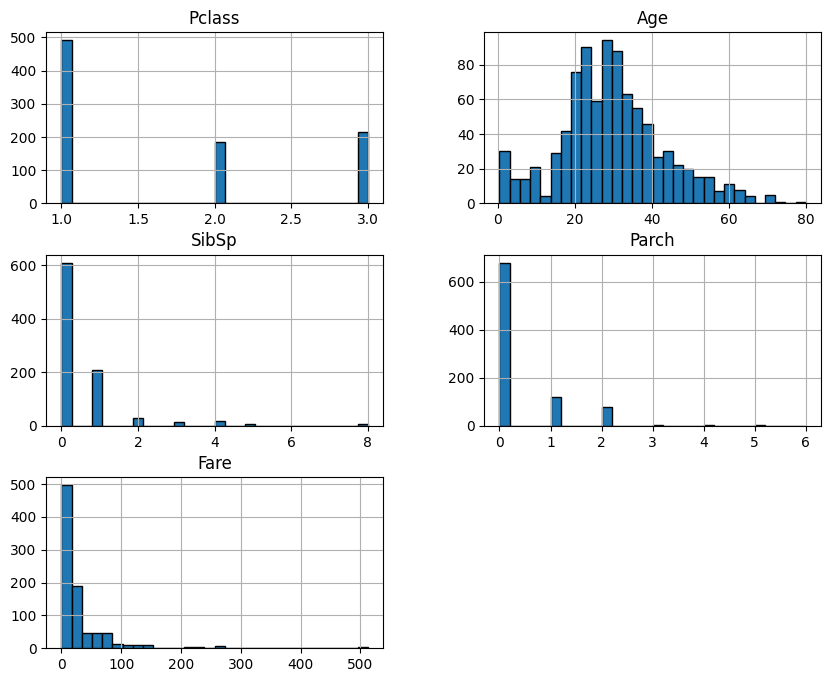

In [11]:
train_df.hist(bins=30, edgecolor='black', figsize=(10, 8))

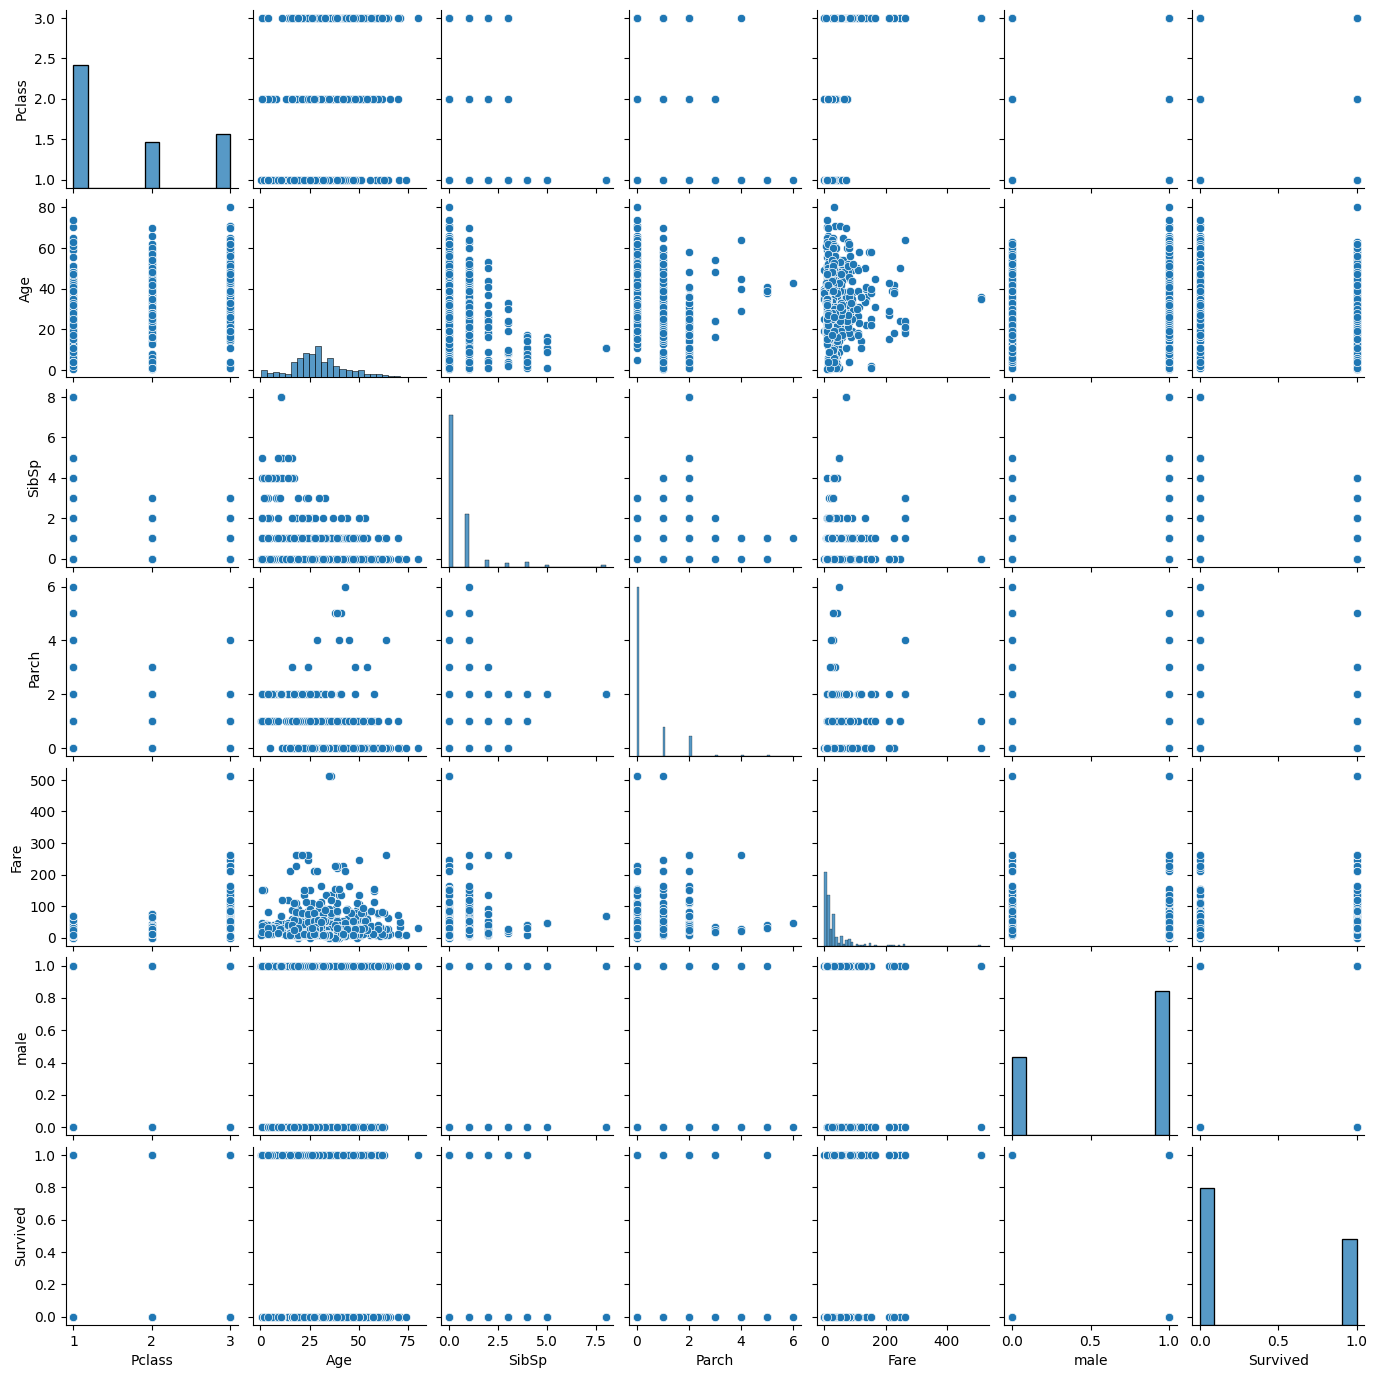

In [12]:
sns.pairplot(train_df.dropna(), diag_kind='hist', height=2)
plt.show()

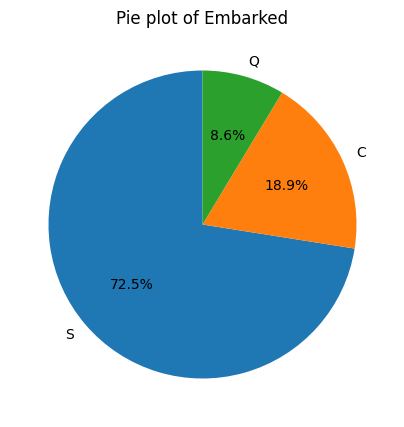

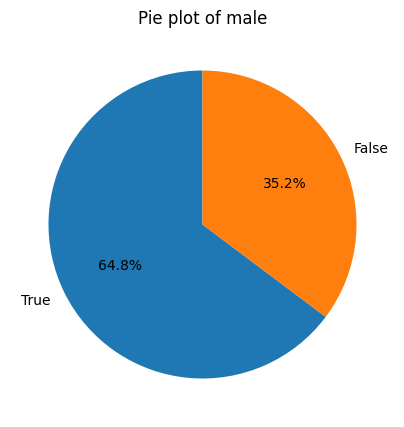

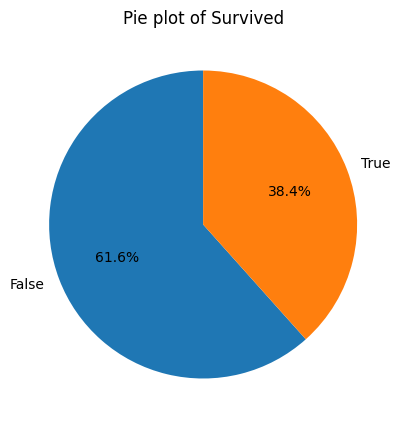

In [13]:
categorical_cols = train_df.select_dtypes(include=['object', 'boolean']).columns

for col in categorical_cols:
    plt.figure(figsize=(5, 5))
    train_df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie plot of {col}')
    plt.ylabel('')
    plt.show()

In [14]:
display(train_df.info())
display(train_df.head())
display(test_df.info())
display(test_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   male      891 non-null    bool   
 7   Survived  891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(1)
memory usage: 43.6+ KB


None

,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Survived
0,1,22.0,1,0,7.2500,S,True,False
1,3,38.0,1,0,71.2833,C,False,True
2,1,26.0,0,0,7.9250,S,False,True
3,3,35.0,1,0,53.1000,S,False,True
4,1,35.0,0,0,8.0500,S,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Embarked  418 non-null    object 
 6   male      418 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 20.1+ KB


None

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,34.5,0,0,7.8292,Q,True
1,3,47.0,1,0,7.0000,S,False
2,2,62.0,0,0,9.6875,Q,True
3,3,27.0,0,0,8.6625,S,True
4,3,22.0,1,1,12.2875,S,False


### Embarked - Survived Chi2 Test

In [15]:
from scipy.stats import chi2_contingency

# Create a contingency table between Survived and Embarked
contingency_table = pd.crosstab(train_df['Survived'], train_df['Embarked'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

Chi-squared statistic: 25.9645
p-value: 0.0000


There is a statistically significant difference between Survived and Embarked.

### Embarked One Hot Encode

In [16]:
# One hot encode 'Embarked' column and drop the first category
train_df = pd.concat([train_df, pd.get_dummies(train_df['Embarked'], prefix='Embarked', drop_first=True)], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Embarked'], prefix='Embarked', drop_first=True)], axis=1)

# Drop the original 'Embarked' column
train_df = train_df.drop(columns=['Embarked'])
test_df = test_df.drop(columns=['Embarked'])

display(train_df.head())
display(test_df.head())

,Pclass,Age,SibSp,Parch,Fare,male,Survived,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,True,False,False,True
1,3,38.0,1,0,71.2833,False,True,False,False
2,1,26.0,0,0,7.9250,False,True,False,True
3,3,35.0,1,0,53.1000,False,True,False,True
4,1,35.0,0,0,8.0500,True,False,False,True


,Pclass,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


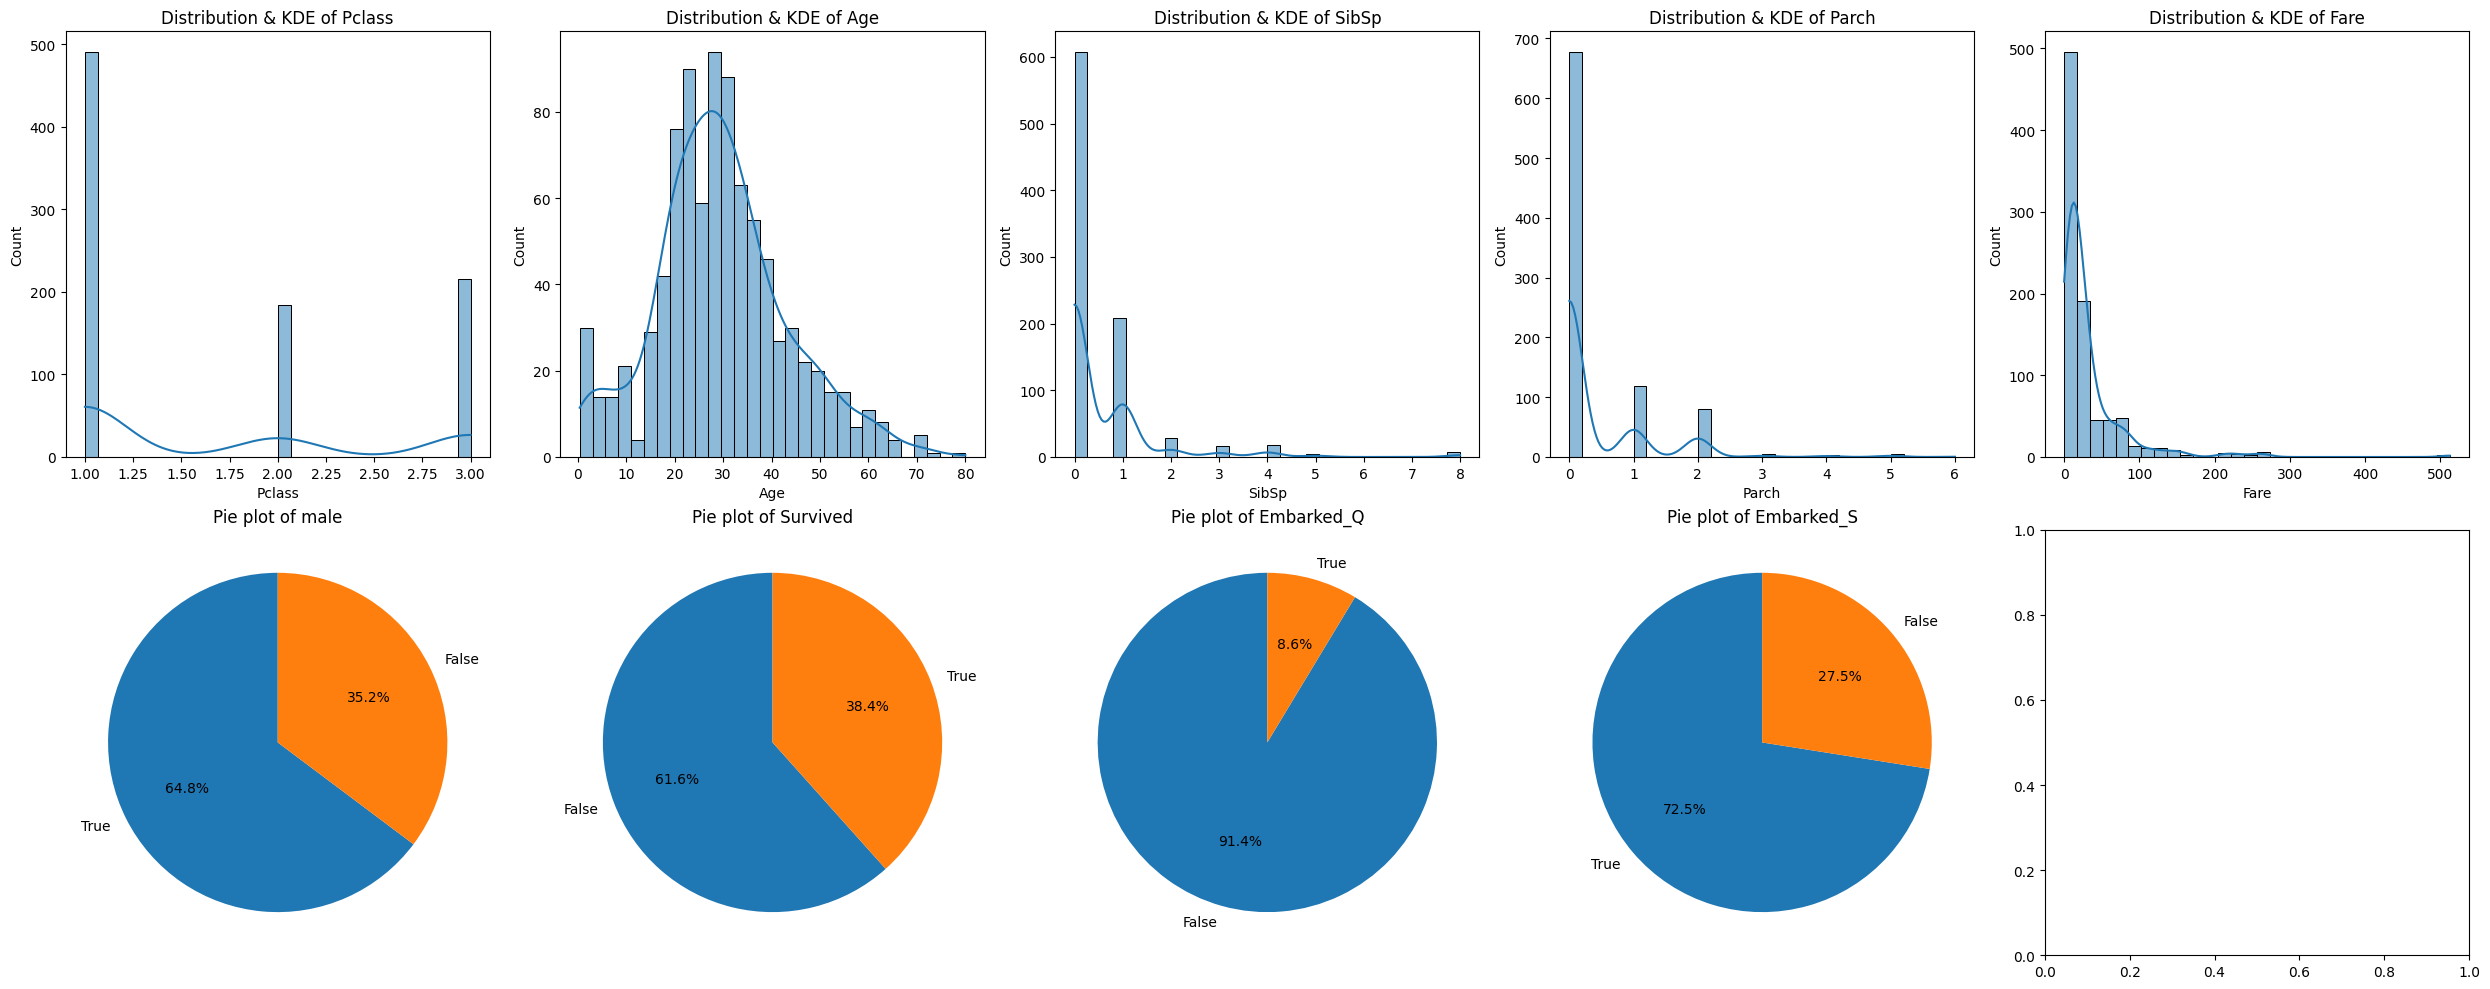

In [17]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_df.select_dtypes(include=['object', 'boolean']).columns
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_cols), figsize=(5 * len(numerical_cols), 10))

# Numerical columns: histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(train_df[col], kde=True, bins=30, ax=axes[0, i])
    axes[0, i].set_title(f'Distribution & KDE of {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Count')

# Categorical columns: pie charts
for i, col in enumerate(categorical_cols):
    train_df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[1, i])
    axes[1, i].set_title(f'Pie plot of {col}')
    axes[1, i].set_ylabel('')

plt.tight_layout()
plt.show()


### Fare 컬럼 log변환

In [18]:
train_df['Fare'] = np.log1p(train_df['Fare'])
test_df['Fare'] = np.log1p(test_df['Fare'])
display(train_df.head())
display(test_df.head())

,Pclass,Age,SibSp,Parch,Fare,male,Survived,Embarked_Q,Embarked_S
0,1,22.0,1,0,2.110213,True,False,False,True
1,3,38.0,1,0,4.280593,False,True,False,False
2,1,26.0,0,0,2.188856,False,True,False,True
3,3,35.0,1,0,3.990834,False,True,False,True
4,1,35.0,0,0,2.202765,True,False,False,True


,Pclass,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S
0,3,34.5,0,0,2.178064,True,True,False
1,3,47.0,1,0,2.079442,False,False,True
2,2,62.0,0,0,2.369075,True,True,False
3,3,27.0,0,0,2.268252,True,False,True
4,3,22.0,1,1,2.586824,False,False,True


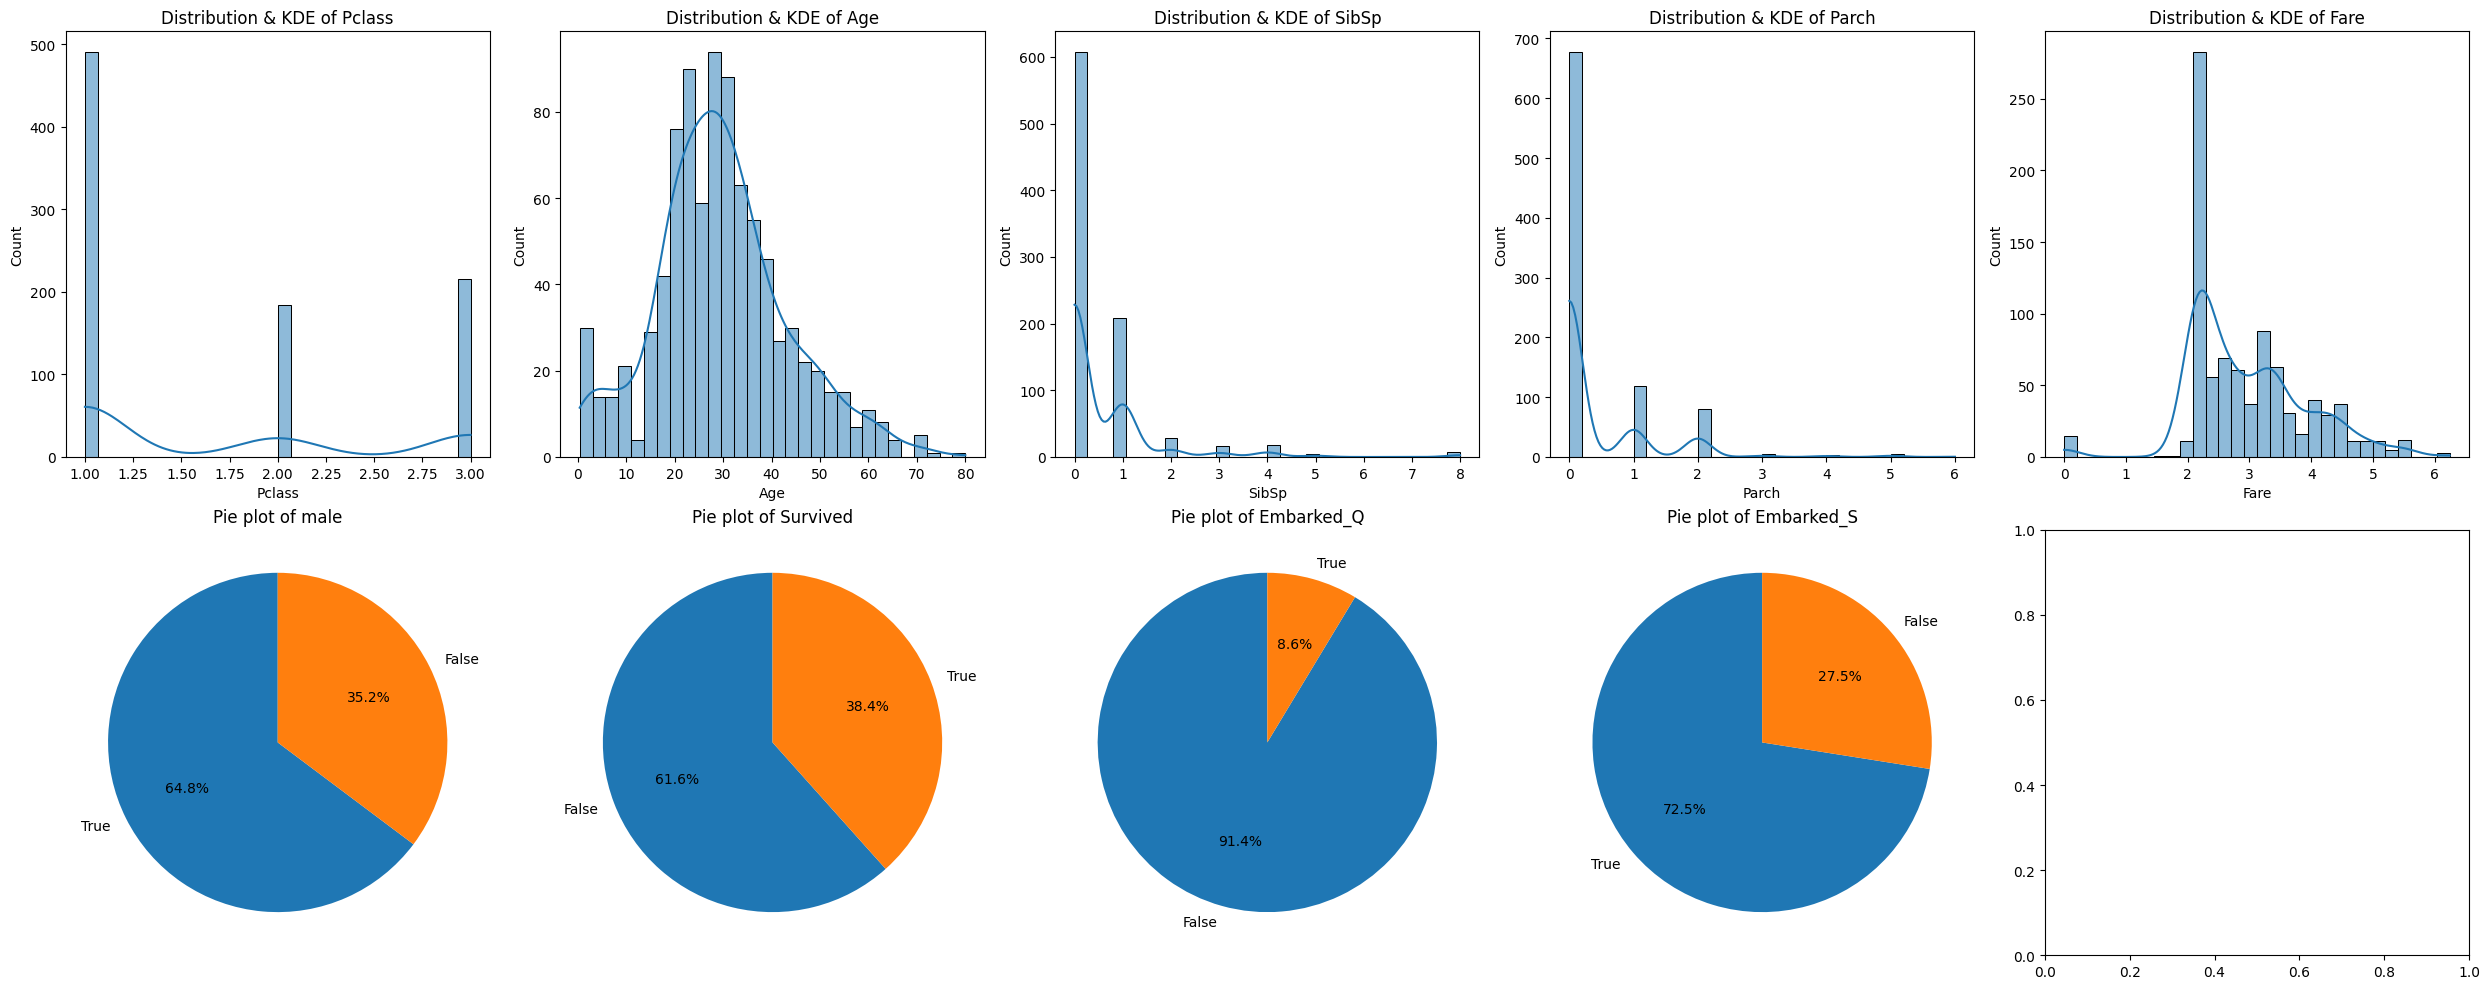

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_cols), figsize=(5 * len(numerical_cols), 10))

# Numerical columns: histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(train_df[col], kde=True, bins=30, ax=axes[0, i])
    axes[0, i].set_title(f'Distribution & KDE of {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Count')

# Categorical columns: pie charts
for i, col in enumerate(categorical_cols):
    train_df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[1, i])
    axes[1, i].set_title(f'Pie plot of {col}')
    axes[1, i].set_ylabel('')

plt.tight_layout()
plt.show()


### Age 피처 변환 필요성 확인

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Dataset 1: Original Age
scores_original = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5, scoring='accuracy')

# Dataset 2: log1p transformed Age
X_log_age = X.copy()
X_log_age['Age'] = np.log1p(X_log_age['Age'])
scores_log_age = cross_val_score(RandomForestClassifier(random_state=42), X_log_age, y, cv=5, scoring='accuracy')

print("CV scores (Original Age):", scores_original)
print("Mean CV score (Original Age):", scores_original.mean())
print("CV scores (log1p Age):", scores_log_age)
print("Mean CV score (log1p Age):", scores_log_age.mean())

CV scores (Original Age): [0.80446927 0.80337079 0.83707865 0.7752809  0.85393258]
Mean CV score (Original Age): 0.8148264390182662
CV scores (log1p Age): [0.81564246 0.80337079 0.83707865 0.7752809  0.85955056]
Mean CV score (log1p Age): 0.8181846713953927


변환안함

### 다중공선성 확인

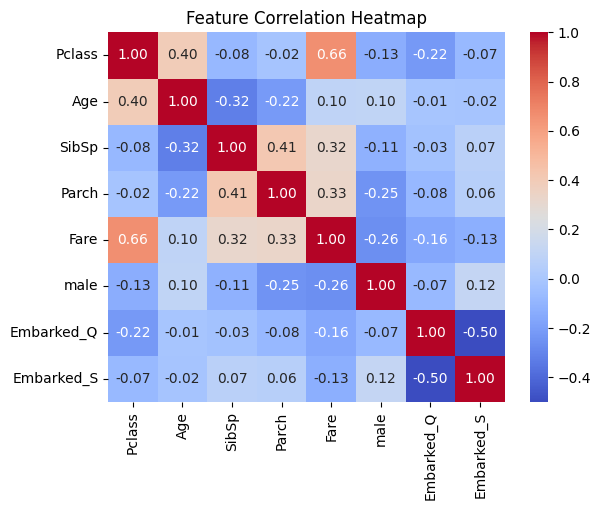

In [21]:
corr_matrix = train_df.drop(columns=['Survived']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude target column 'Survived' for VIF calculation
features = train_df.drop(columns=['Survived'])

# Convert boolean columns to int for VIF calculation
features_vif = features.copy()
for col in features_vif.select_dtypes(include='bool').columns:
	features_vif[col] = features_vif[col].astype(int)

vif_data = pd.DataFrame()
vif_data['feature'] = features_vif.columns
vif_data['VIF'] = [variance_inflation_factor(features_vif.values, i) for i in range(features_vif.shape[1])]

display(vif_data)

,feature,VIF
0,Pclass,13.099504
1,Age,7.272031
2,SibSp,1.845475
3,Parch,1.726511
4,Fare,18.593076
5,male,2.791953
6,Embarked_Q,1.342570
7,Embarked_S,3.781085


In [23]:
# Calculate mean Fare by Pclass
fare_mean_by_class = train_df.groupby('Pclass')['Fare'].transform('mean')

# Create Fare_deviation feature
train_df['Fare_deviation'] = train_df['Fare'] - fare_mean_by_class

# Apply to test_df as well
fare_mean_by_class_test = test_df.groupby('Pclass')['Fare'].transform('mean')
test_df['Fare_deviation'] = test_df['Fare'] - fare_mean_by_class_test

display(train_df.head())
display(test_df.head())

,Pclass,Age,SibSp,Parch,Fare,male,Survived,Embarked_Q,Embarked_S,Fare_deviation
0,1,22.0,1,0,2.110213,True,False,False,True,-0.380799
1,3,38.0,1,0,4.280593,False,True,False,False,0.182845
2,1,26.0,0,0,2.188856,False,True,False,True,-0.302156
3,3,35.0,1,0,3.990834,False,True,False,True,-0.106914
4,1,35.0,0,0,2.202765,True,False,False,True,-0.288247


,Pclass,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S,Fare_deviation
0,3,34.5,0,0,2.178064,True,True,False,-0.262264
1,3,47.0,1,0,2.079442,False,False,True,-0.360887
2,2,62.0,0,0,2.369075,True,True,False,-0.641489
3,3,27.0,0,0,2.268252,True,False,True,-0.172076
4,3,22.0,1,1,2.586824,False,False,True,0.146495


PClass - Fare 다중공선성 문제 해결을 위해 PClass 유지, PClass에 따르지만 요금의 변동을 나타내기 위한 PClass당 평균 Fare에서의 편차인 Fare_deviation 생성

In [24]:
test_df = test_df.drop(columns=['Fare'])
train_df = train_df.drop(columns=['Fare'])

In [25]:
display(train_df.head())
display(test_df.head())

,Pclass,Age,SibSp,Parch,male,Survived,Embarked_Q,Embarked_S,Fare_deviation
0,1,22.0,1,0,True,False,False,True,-0.380799
1,3,38.0,1,0,False,True,False,False,0.182845
2,1,26.0,0,0,False,True,False,True,-0.302156
3,3,35.0,1,0,False,True,False,True,-0.106914
4,1,35.0,0,0,True,False,False,True,-0.288247


,Pclass,Age,SibSp,Parch,male,Embarked_Q,Embarked_S,Fare_deviation
0,3,34.5,0,0,True,True,False,-0.262264
1,3,47.0,1,0,False,False,True,-0.360887
2,2,62.0,0,0,True,True,False,-0.641489
3,3,27.0,0,0,True,False,True,-0.172076
4,3,22.0,1,1,False,False,True,0.146495


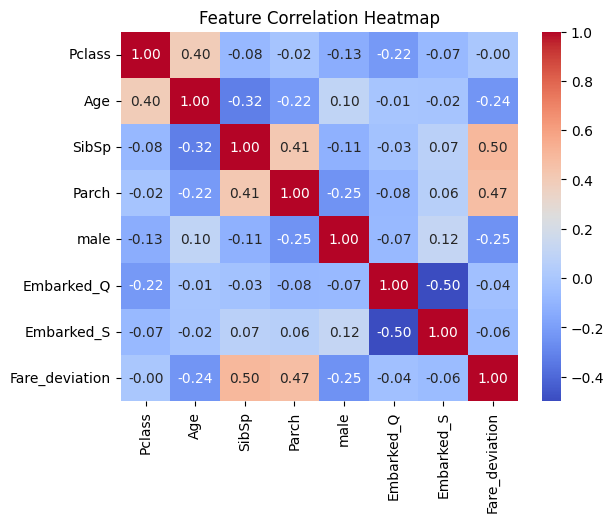

In [26]:
corr_matrix = train_df.drop(columns=['Survived']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [27]:
features = train_df.drop(columns=['Survived'])

# Convert boolean columns to int for VIF calculation
features_vif = features.copy()
for col in features_vif.select_dtypes(include='bool').columns:
	features_vif[col] = features_vif[col].astype(int)

vif_data = pd.DataFrame()
vif_data['feature'] = features_vif.columns
vif_data['VIF'] = [variance_inflation_factor(features_vif.values, i) for i in range(features_vif.shape[1])]

display(vif_data)

,feature,VIF
0,Pclass,5.320063
1,Age,7.073697
2,SibSp,1.807925
3,Parch,1.681428
4,male,2.789063
5,Embarked_Q,1.270381
6,Embarked_S,3.678408
7,Fare_deviation,1.577792


AGE VIF가 7로 매우 높은 수준은 아니기에 두지만 Pclass와 SibSp의 영향을 일부 받고 있으므로 해석에 주의가 필요

### SibSp + Parch -> FamiliySize

In [28]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

train_df = train_df.drop(columns=['SibSp', 'Parch'])
test_df = test_df.drop(columns=['SibSp', 'Parch'])

### 최종 데이터셋 확인

In [29]:
display(train_df.head())
display(test_df.head())

,Pclass,Age,male,Survived,Embarked_Q,Embarked_S,Fare_deviation,FamilySize
0,1,22.0,True,False,False,True,-0.380799,1
1,3,38.0,False,True,False,False,0.182845,1
2,1,26.0,False,True,False,True,-0.302156,0
3,3,35.0,False,True,False,True,-0.106914,1
4,1,35.0,True,False,False,True,-0.288247,0


,Pclass,Age,male,Embarked_Q,Embarked_S,Fare_deviation,FamilySize
0,3,34.5,True,True,False,-0.262264,0
1,3,47.0,False,False,True,-0.360887,1
2,2,62.0,True,True,False,-0.641489,0
3,3,27.0,True,False,True,-0.172076,0
4,3,22.0,False,False,True,0.146495,2


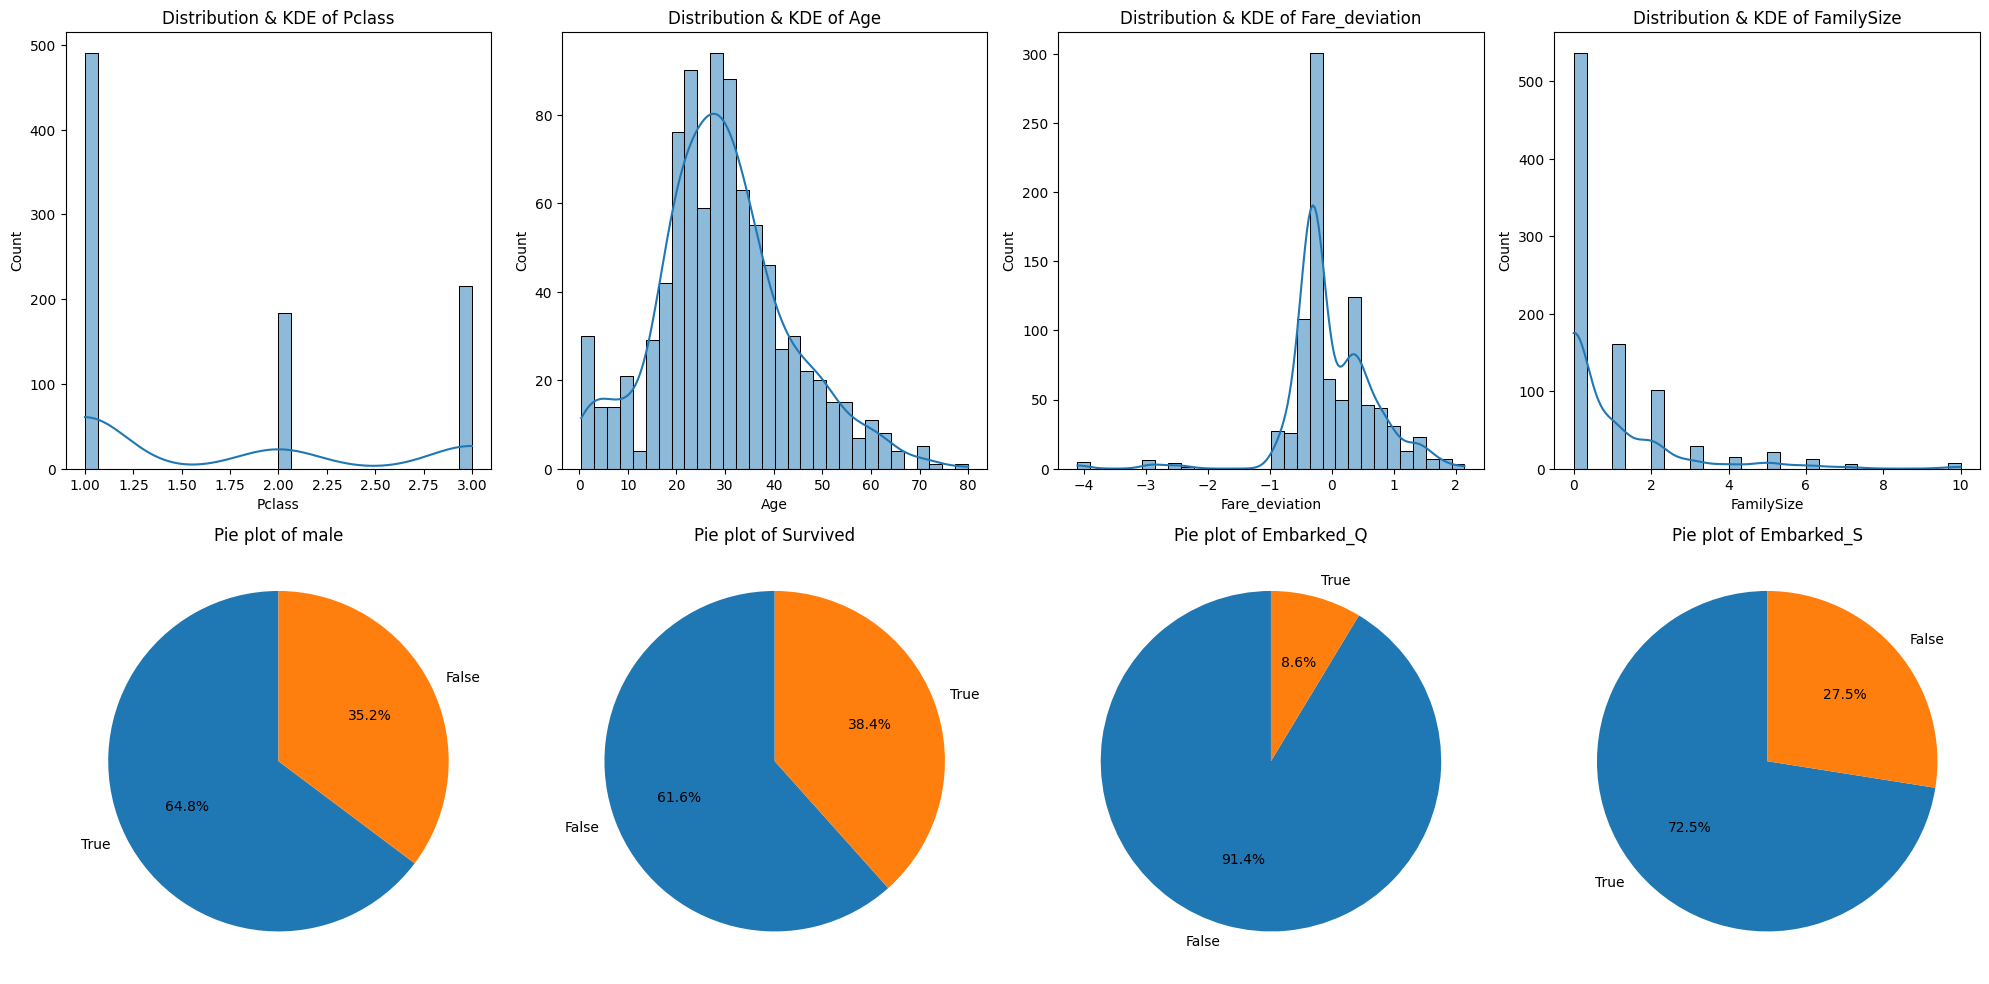

In [30]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=2, ncols=len(numerical_cols), figsize=(5 * len(numerical_cols), 10))

# Numerical columns: histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(train_df[col], kde=True, bins=30, ax=axes[0, i])
    axes[0, i].set_title(f'Distribution & KDE of {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Count')

# Categorical columns: pie charts
for i, col in enumerate(categorical_cols):
    train_df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[1, i])
    axes[1, i].set_title(f'Pie plot of {col}')
    axes[1, i].set_ylabel('')

plt.tight_layout()
plt.show()

## 모델링

### 스케일링

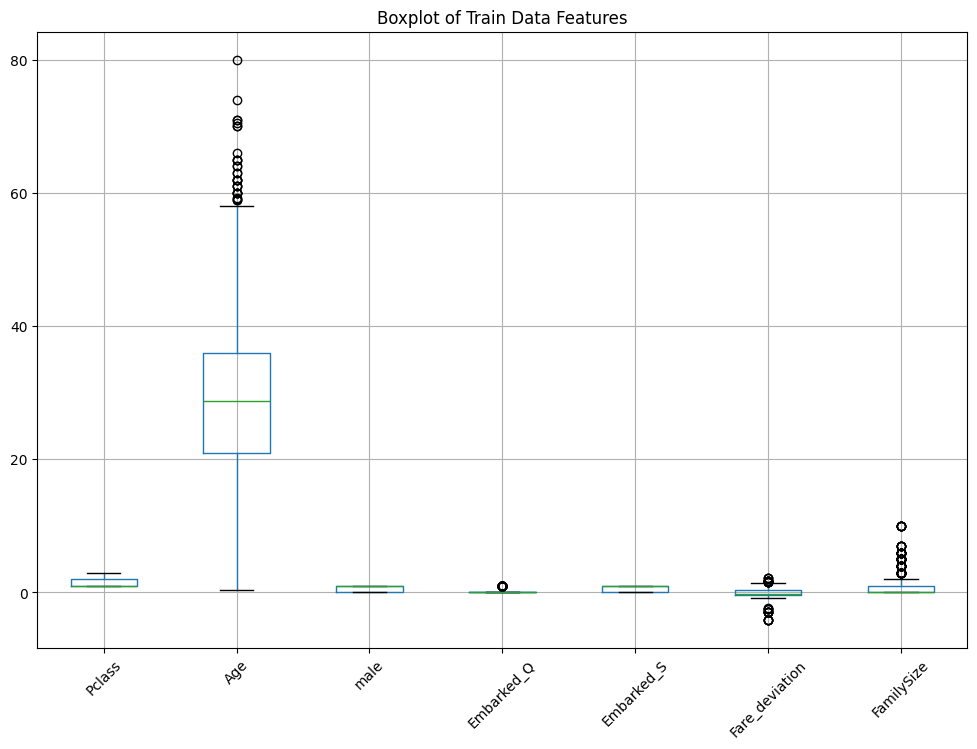

In [31]:
plt.figure(figsize=(12, 8))
train_df.drop(columns=['Survived']).boxplot()
plt.title('Boxplot of Train Data Features')
plt.xticks(rotation=45)
plt.show()

| 피처 (Feature) | 추천 스케일러 | 선택 근거 (Reasoning) |
| :--- | :--- | :--- |
| **Age** | `StandardScaler` | 분포가 정규분포에 가깝고 이상치가 적음 -> 기존 분포 형태를 유지하면서 스케일을 조정하기에 가장 적합|
| **Fare_deviation** | `StandardScaler` | 분포가 0을 중심으로 비교적 대칭적. 양쪽에 이상치가 존재하므로 `MinMaxScaler`보다 안정적인 `StandardScaler`|
| **FamilySize** | `QuantileTransformer` | 분포가 매우 오른쪽으로 치우쳐 있고(right-skewed), 이상치가 많음 -> 이상치에 강건하고 분포를 정규분포 형태로 변환해주는 `QuantileTransformer`가 가장 효과적 |
| **Pclass** | `StandardScaler` | 순서형(ordinal) 피처지만, 다른 수치형 피처와의 스케일을 맞추기 위해 표준화 필요. 이상치가 없어 `StandardScaler`가 적합 |
| **male, Embarked_Q, Embarked_S** | **스케일링 불필요** | 이미 0과 1의 값을 가지는 이진(binary) 피처이므로 별도의 스케일링이 불필요 |

In [32]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

# Initialize scalers
standard_scaler = StandardScaler()
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Columns to scale
standard_cols = ['Age', 'Fare_deviation', 'Pclass']
quantile_cols = ['FamilySize']

# Fit scalers on train_df
train_standard_scaled = standard_scaler.fit_transform(train_df[standard_cols])
train_quantile_scaled = quantile_transformer.fit_transform(train_df[quantile_cols])

# Apply to test_df
test_standard_scaled = standard_scaler.transform(test_df[standard_cols])
test_quantile_scaled = quantile_transformer.transform(test_df[quantile_cols])

# Create scaled DataFrames
train_scaled_df = train_df.copy()
test_scaled_df = test_df.copy()

train_scaled_df[standard_cols] = train_standard_scaled
train_scaled_df[quantile_cols] = train_quantile_scaled

test_scaled_df[standard_cols] = test_standard_scaled
test_scaled_df[quantile_cols] = test_quantile_scaled

display(train_scaled_df.head())
display(test_scaled_df.head())

display(train_scaled_df.describe(include='all'))
display(test_scaled_df.describe(include='all'))

c:\Users\1029l\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py:2846: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


,Pclass,Age,male,Survived,Embarked_Q,Embarked_S,Fare_deviation,FamilySize
0,-0.827377,-0.562393,True,False,False,True,-0.537522,0.503509
1,1.566107,0.613964,False,True,False,False,0.258097,0.503509
2,-0.827377,-0.268304,False,True,False,True,-0.426512,-5.199338
3,1.566107,0.393397,False,True,False,True,-0.150916,0.503509
4,-0.827377,0.393397,True,False,False,True,-0.406879,-5.199338


,Pclass,Age,male,Embarked_Q,Embarked_S,Fare_deviation,FamilySize
0,1.566107,0.356636,True,True,False,-0.370203,-5.199338
1,1.566107,1.275666,False,False,True,-0.509415,0.503509
2,0.369365,2.378501,True,True,False,-0.905503,-5.199338
3,1.566107,-0.194781,True,False,True,-0.242897,-5.199338
4,1.566107,-0.562393,False,False,True,0.206787,0.998623


,Pclass,Age,male,Survived,Embarked_Q,Embarked_S,Fare_deviation,FamilySize
count,8.910000e+02,8.910000e+02,891,891,891,891,8.910000e+02,891.000000
unique,NaN,NaN,2,2,2,2,NaN,NaN
top,NaN,NaN,True,False,False,True,NaN,NaN
freq,NaN,NaN,577,549,814,646,NaN,NaN
mean,8.772133e-17,-4.386066e-17,NaN,NaN,NaN,NaN,-3.189866e-17,-2.731070
std,1.000562e+00,1.000562e+00,NaN,NaN,NaN,NaN,1.000562e+00,3.079614
min,-8.273772e-01,-2.149006e+00,NaN,NaN,NaN,NaN,-5.784232e+00,-5.199338
25%,-8.273772e-01,-6.359156e-01,NaN,NaN,NaN,NaN,-4.544645e-01,-5.199338
50%,-8.273772e-01,-6.629075e-02,NaN,NaN,NaN,NaN,-3.144392e-01,-5.199338
75%,3.693648e-01,4.669197e-01,NaN,NaN,NaN,NaN,5.774640e-01,0.503509


,Pclass,Age,male,Embarked_Q,Embarked_S,Fare_deviation,FamilySize
count,418.000000,418.000000,418,418,418,4.170000e+02,418.000000
unique,NaN,NaN,2,2,2,NaN,NaN
top,NaN,NaN,True,False,True,NaN,NaN
freq,NaN,NaN,266,372,270,NaN,NaN
mean,0.687160,0.057855,NaN,NaN,NaN,3.258784e-16,-2.757392
std,1.007462,0.968754,NaN,NaN,NaN,9.044082e-01,3.067526
min,-0.827377,-2.167386,NaN,NaN,NaN,-5.912398e+00,-5.199338
25%,-0.827377,-0.562393,NaN,NaN,NaN,-4.659790e-01,-5.199338
50%,1.566107,-0.063401,NaN,NaN,NaN,-3.353366e-01,-5.199338
75%,1.566107,0.578720,NaN,NaN,NaN,4.241908e-01,0.503509


### 훈련셋 분할

In [33]:
from sklearn.model_selection import train_test_split

# Split train_df into features and target
X = train_scaled_df.drop(columns=['Survived'])
y = train_scaled_df['Survived']

# Split into train and validation sets (70:30), stratified by 'Survived'
train_X, val_X, train_Y, val_Y = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

display(train_X.head())
display(train_Y.head())
display(val_X.head())
display(val_Y.head())

,Pclass,Age,male,Embarked_Q,Embarked_S,Fare_deviation,FamilySize
748,1.566107,-0.782960,True,False,True,-0.150916,0.503509
45,-0.827377,0.060659,True,False,True,-0.406879,-5.199338
28,-0.827377,-0.501006,False,True,False,-0.433774,-5.199338
633,1.566107,0.677921,True,False,True,-5.784232,-5.199338
403,-0.827377,-0.121259,True,False,True,0.470529,0.503509


748    False
45     False
28      True
633    False
403    False
Name: Survived, dtype: bool

,Pclass,Age,male,Embarked_Q,Embarked_S,Fare_deviation,FamilySize
625,1.566107,2.304979,True,False,True,-0.835034,-5.199338
566,-0.827377,-0.782960,True,False,True,-0.431138,-5.199338
459,-0.827377,0.376591,True,True,False,-0.454464,-5.199338
804,-0.827377,-0.194781,True,False,True,-0.585376,-5.199338
338,-0.827377,1.128621,True,False,True,-0.406879,-5.199338


625    False
566    False
459    False
804     True
338     True
Name: Survived, dtype: bool

### 모델 선정

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': [100, 500, 1000],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 500, 1000],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'LightGBM': {
        'n_estimators': [100, 500, 1000],
        'max_depth': [-1, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

best_results = []
for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(train_X, train_Y)
    best_model = grid.best_estimator_
    val_pred = best_model.predict(val_X)
    best_results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': accuracy_score(val_Y, val_pred),
        'Precision': precision_score(val_Y, val_pred),
        'Recall': recall_score(val_Y, val_pred),
        'F1': f1_score(val_Y, val_pred)
    })

best_results_df = pd.DataFrame(best_results)
display(best_results_df)


[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Model,Best Params,Accuracy,Precision,Recall,F1
0,Logistic Regression,"{'C': 1, 'solver': 'liblinear'}",0.779851,0.711538,0.718447,0.714976
1,SVM,"{'C': 1, 'gamma': 'auto'}",0.802239,0.812500,0.631068,0.710383
2,Random Forest,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.805970,0.793103,0.669903,0.726316
3,XGBoost,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.809701,0.817073,0.650485,0.724324
4,LightGBM,"{'learning_rate': 0.01, 'max_depth': -1, 'n_es...",0.798507,0.769231,0.679612,0.721649


### Test

In [37]:
test_Y = pd.read_csv("https://raw.githubusercontent.com/screamingpeanut01/DartBase/refs/heads/main/TITANIC2025-2/submission.csv")
test_Y.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Get best parameters for Random Forest from results_df or previous grid search
best_rf_params = {
    'n_estimators': 1000,
    'max_depth': 10,
    'min_samples_split': 2
}

# Train Random Forest with best parameters on full train_scaled_df
rf = RandomForestClassifier(**best_rf_params, random_state=42)
rf.fit(train_scaled_df.drop(columns=['Survived']), train_scaled_df['Survived'])

# Predict on test_scaled_df
test_pred = rf.predict(test_scaled_df)

print("====Val Score=====")

# Since test_df does not have true labels, show classification report on validation set
val_pred_rf = rf.predict(val_X)
print(classification_report(val_Y, val_pred_rf))

print("====Test Score=====")

# test_pred is already computed above
print(classification_report(test_Y['Survived'], test_pred))


====Val Score=====
              precision    recall  f1-score   support

       False       0.94      0.98      0.96       165
        True       0.96      0.90      0.93       103

    accuracy                           0.95       268
   macro avg       0.95      0.94      0.94       268
weighted avg       0.95      0.95      0.95       268

====Test Score=====
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       266
           1       0.87      0.82      0.85       152

    accuracy                           0.89       418
   macro avg       0.89      0.88      0.88       418
weighted avg       0.89      0.89      0.89       418



- **정확도(Accuracy)**: 전체 검증 데이터 중 95%를 올바르게 예측
- **사망(False) 클래스**
    - **정밀도(Precision)**: 0.94 — 모델이 사망이라고 예측한 승객 중 실제로 사망한 비율
    - **재현율(Recall)**: 0.98 — 실제로 사망한 승객 중 모델이 올바르게 예측한 비율
    - **F1 점수**: 0.96 — 정밀도와 재현율의 조화 평균
- **생존(True) 클래스**
    - **정밀도**: 0.96 — 모델이 생존이라고 예측한 승객 중 실제로 생존한 비율
    - **재현율**: 0.90 — 실제로 생존한 승객 중 모델이 올바르게 예측한 비율
    - **F1 점수**: 0.93

**해석:**  
모델은 사망자를 매우 잘 예측(재현율 0.98)하며, 생존자도 높은 정밀도(0.96)와 재현율(0.90}  

생존자 예측의 재현율이 다소 낮으므로 일부 생존자를 놓칠 수 있지만, 전체적으로 균형 잡힌 성능(정확도 95%)  

구조 대상자를 놓치지 않으려면 재현율을, 잘못된 구조 시도를 줄이려면 정밀도를 참고  
